# 딥러닝1 : 회귀

## 1.환경준비

### (1) 라이브러리 로딩

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 그래프

### (2) 데이터로딩

In [ ]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


|	변수	|	설명	|
|----|----|
|	medv	|	타운별 집값(중위수)	|
|	crim	|	범죄율	|
|	zn	|	25,000 평방피트를 초과 거주지역 비율	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


## 2.데이터 준비

lstat, ptratio, crim 만 이용하여 medv를 예측하는 모델을 만들어 봅시다.

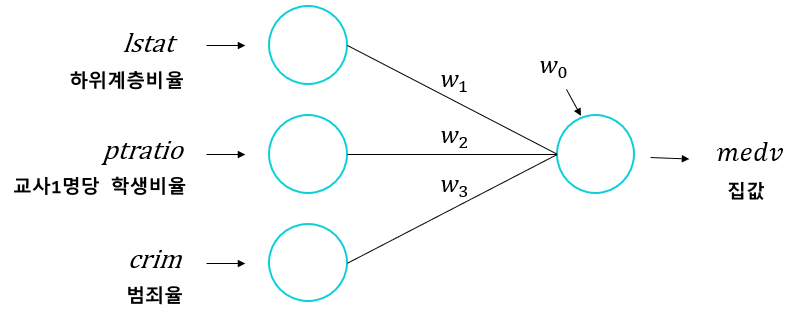

### (1) 데이터 준비
* x, y 나누기
    * x : lstat, ptratio, crim
    * y : medv

In [ ]:
target = 'medv'
features = ['lstat', 'ptratio', 'crim']
x = data.loc[:, features]                  # loc[행,열]: 모든 행, feature 열의 값들만 x에
y = data.loc[:, target]

### (2) NaN 조치

### (3) 가변수화

#### 결측치 없고 범주형 데이터 없어서 가변수화 x

### (4) 데이터분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

### (5) Scaling

In [ ]:
# 스케일러 선언
scaler = MinMaxScaler()                     # x_norm = (x-x_min)/(x_max-x_min)

# train 셋으로 fitting & 적용
x_train = scaler.fit_transform(x_train)     # fit: 최댓값, 최솟값 계산 / transform: 식을 계산

# validation 셋은 적용만!
x_val = scaler.transform(x_val)             # fit을 안하는건 최댓값, 최솟값이 바뀌니까 처음에 지정한걸로

## 3.딥러닝1 : 3개의 feature

### (1) 모델설계

In [ ]:
# 분석단위의 shape
nfeatures = x_train.shape[1] #num of columns
nfeatures

3

In [ ]:
# 메모리 정리
clear_session()

# Sequential 타입
model = Sequential([Input(shape = (nfeatures,)),
                    Dense(1) ])
# 모델요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

* compile
    * optimizer = 'adam'    : 기본값으로 옵티마이저 사용(learning_rate = 0.001)
    * optimizer = Adam(lr = 0.1) : 옵션 값 조정 가능
        * lr과 learning_rate은 같지만, learning_rate 사용을 권장

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.1), loss = 'mse')

### (2) 학습

validation_split=0.2 : 학습시, 학습용 데이터에서 0.2 만큼 떼어 내서 검증셋으로 활용

In [ ]:
history = model.fit(x_train, y_train,
                    epochs = 20, validation_split=0.2).history

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 531.3456 - val_loss: 548.8332
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 489.2510 - val_loss: 473.6246
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 416.0081 - val_loss: 410.6843
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 368.3292 - val_loss: 359.9427
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 318.6776 - val_loss: 318.9693
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 262.8404 - val_loss: 286.2523
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 247.3183 - val_loss: 260.2755
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 220.5972 - val_loss: 240.7331
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 174.4423 - val_loss: 225.8649
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 182.7745 - val_loss: 214.4933
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 185.2179 - val_loss: 204.7603
Epoch 12/20
11/11 ━━━━━

* 학습결과 그래프

In [ ]:
# 함수로 만들어서 사용합시다.
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

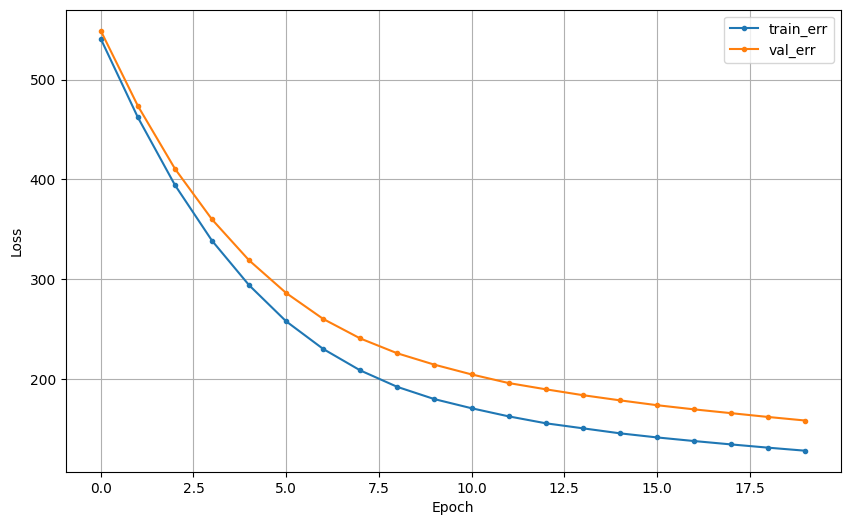

In [ ]:
dl_history_plot(history)

### (3) 예측 및 검증

In [ ]:
pred = model.predict(x_val)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
print(f'RMSE : {root_mean_squared_error(y_val, pred)}')
print(f'MAE  : {mean_absolute_error(y_val, pred)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred)}')

RMSE : 9.660444565287905
MAE  : 6.476290409237731
MAPE : 0.34392471043283873


## 4.딥러닝2 : 전체 feature
* 이제 전체 데이터를 가지고 모델링을 시도해 보겠습니다.


### (1) 데이터 전처리

In [ ]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


* x,y 나누기 & 데이터 분할

In [ ]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [ ]:
nfeatures = x_train.shape[1]
nfeatures

12

In [ ]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model2 = Sequential([Input(shape = (nfeatures,)),
                    Dense(1) ])

# 모델요약
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

* compile

In [ ]:
model2.compile( optimizer= 'adam', loss = 'mse' )   # 위랑 다르게 optimizer='adam'이면 learning rate를 기본(0.1)로

* 학습

In [ ]:
history = model2.fit(x_train, y_train, epochs = 20, validation_split= 0.2 ).history

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 567.8176 - val_loss: 628.1120
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 565.1597 - val_loss: 625.7177
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 577.7243 - val_loss: 623.3412
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 564.6851 - val_loss: 620.9716
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 538.0874 - val_loss: 618.6093
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 616.7908 - val_loss: 616.2542
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 537.9938 - val_loss: 613.9344
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 587.0215 - val_loss: 611.6157
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 583.0040 - val_loss: 609.3018
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 529.2012 - val_loss: 606.9713
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 597.8713 - val_loss: 604.6153
Epoch 12/20
11/11 ━━━━━━━━━

* 학습결과 그래프

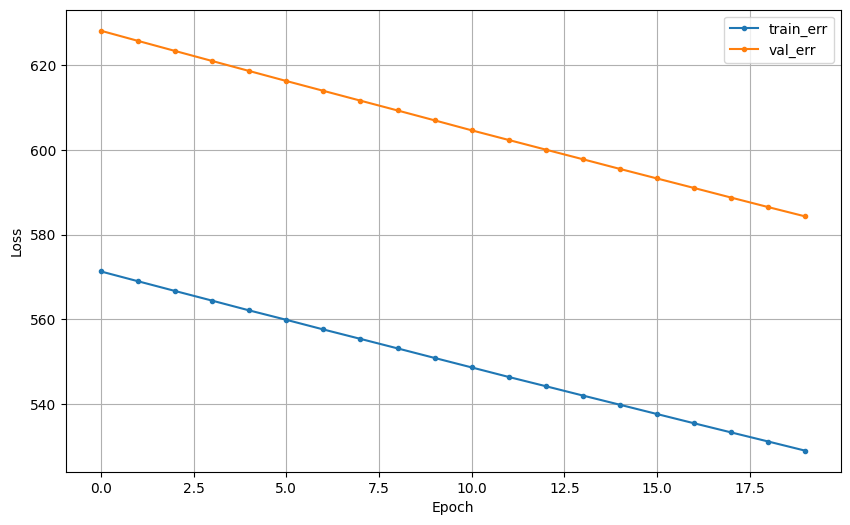

In [ ]:
dl_history_plot(history)

* 예측 및 평가

In [ ]:
pred2 = model2.predict(x_val)
print(f'RMSE : {root_mean_squared_error(y_val, pred2)}')
print(f'MAE  : {mean_absolute_error(y_val, pred2)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred2)}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
RMSE : 21.61280687461325
MAE  : 19.984476357464697
MAPE : 0.9080339693888123


* 회귀 모델 예측값 vs 실제값 그래프

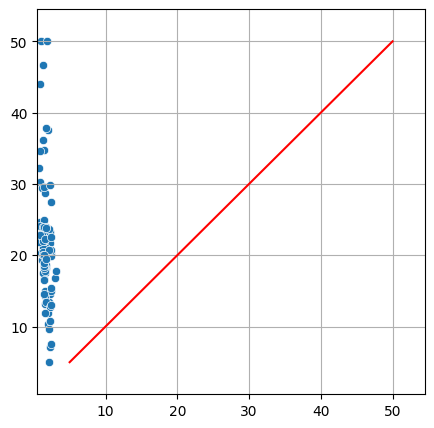

In [ ]:
def visualization_result(y_val,pred):
    plt.figure(figsize = (5,5))
    y = x = np.linspace(y_val.min(), y_val.max(), 10)

    y_range = y_val.max() - y_val.min()
    mi, ma = y_val.min() - y_range*0.1 , y_val.max()+ y_range*0.1

    sns.scatterplot(x= pred.reshape(-1), y = y_val.values)
    sns.lineplot(x = x, y = y, color = 'r')
    plt.xlim(mi, ma)
    plt.ylim(mi, ma)
    plt.grid()

    plt.show()

visualization_result(y_val,pred2)

## 5.복습문제(9/21)
* 위 4번에 이어서, 여러분은 다음을 조절할 수 있습니다.
    * epochs(반복횟수), learning_rate(학습율)
* 4번 코드를 그대로 보면서 작성하고 위 두가지를 조절하며 성능을 높여봅시다!

### (1) 데이터 전처리

* 데이터 분할

In [ ]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [ ]:
nfeatures = x_train.shape[1]
nfeatures

12

In [ ]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model_prac = Sequential([Input(shape = (nfeatures,)),
                    Dense(1) ])

# 모델요약
model_prac.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

* compile

In [ ]:
model_prac.compile(optimizer=Adam(learning_rate=0.1), loss='mse')

* 학습

In [ ]:
history = model_prac.fit(x_train, y_train, epochs = 20, validation_split= 0.2 ).history

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 506.5303 - val_loss: 439.4663
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 337.6382 - val_loss: 302.1067
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 217.7206 - val_loss: 227.3825
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 191.6671 - val_loss: 191.4499
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 148.7780 - val_loss: 173.4091
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 138.8651 - val_loss: 158.7730
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 125.6200 - val_loss: 145.2715
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 140.9480 - val_loss: 133.1667
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 120.6355 - val_loss: 122.7249
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 99.4640 - val_loss: 113.8972
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 95.4858 - val_loss: 105.1995
Epoch 12/20
11/11 ━━━━━━━━━━━

* 학습결과 그래프

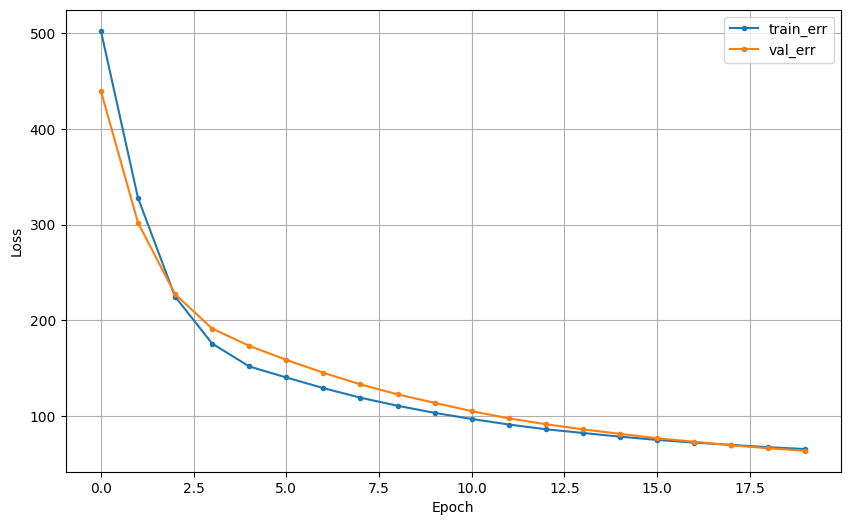

In [ ]:
dl_history_plot(history)

* 예측 및 평가

In [ ]:
pred2 = model_prac.predict(x_val)
print(f'RMSE : {root_mean_squared_error(y_val, pred2)}')
print(f'MAE  : {mean_absolute_error(y_val, pred2)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred2)}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
RMSE : 6.989531546981824
MAE  : 4.999738162171608
MAPE : 0.2547680992818976


----